<a href="https://colab.research.google.com/github/j23-cs167/notebook-3-Venamax21/blob/main/Notebook3_vena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook #3: Cross Validation with kNN and Wine Ratings
**Name: your name here**


Prepare the data

In [1]:
import pandas
import numpy
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# change the path so to access the data on your drive 
wine_data = pandas.read_csv('/content/drive/MyDrive/ColabNotebooks/CS167Datasets/winequality-white.csv')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Exercise #1. 
Implement mean squared error (mse) algorithm

In [72]:
from sklearn.metrics import mean_squared_error

def mse(actual,predicted):
    mse = mean_squared_error(actual, predicted)
    return mse
    # INPUT: 
    #   actual: a list of values
    #   predicted: a list of values
    #   (we assume that number of elements in actual and predicted match)
    # OUTPUT: 
    #   the mean squared error between the actual and predicted values
    print('your code here')
    # prediction_error =  ((actual - predicted)**2).mean

    #https://www.youtube.com/watch?v=dv5xxbFdzro

In [73]:
#  actual: a list of values
actual_values = [1, 2, 3, 4, 5]
#  predicted: a list of values
predicted_values = [1, 2, 3, 4, 5]
print("MSE: ", mse(actual_values, predicted_values))

MSE:  0.0


# Exercise #2
Implement the testing and training data. Use the approximately the first 320 rows in the shuffled set as testing data. 

In [74]:
# change the path so to access the data on your drive 
wine_data = pandas.read_csv('/content/drive/MyDrive/ColabNotebooks/CS167Datasets/winequality-white.csv')

#shuffle the data "sampling" the full set in random order
shuffled_data = wine_data.sample(frac=1, random_state=41)

# establish test_data and train_data here
#use the first 320 rows in the shuffled set as testing data 
#train with the rest #1279 of 1599

test_data = shuffled_data.iloc[0:320]
train_data = shuffled_data.iloc[320:]
print(test_data.shape)
print(train_data.shape)



(320, 12)
(1279, 12)


# Exercise #3
Use the kNN implementation and the other code provided below to normalize your data. Test your model using several different values of k and **graphically show** the results using your implementation of **mse**.

In [82]:
def regression_kNN(new_example, train_data, k):
  train_data_copy = train_data.copy()
  train_data_copy['distance_to_new'] = numpy.sqrt(
    (new_example['fixed acidity']-train_data['fixed acidity'])**2
    +(new_example['volatile acidity']-train_data['volatile acidity'])**2
    +(new_example['citric acid']-train_data['citric acid'])**2
    +(new_example['residual sugar']-train_data['residual sugar'])**2
    +(new_example['chlorides']-train_data['chlorides'])**2
    +(new_example['free sulfur dioxide']-train_data['free sulfur dioxide'])**2
    +(new_example['total sulfur dioxide']-train_data['total sulfur dioxide'])**2
    +(new_example['density']-train_data['density'])**2
    +(new_example['pH']-train_data['pH'])**2
    +(new_example['sulphates']-train_data['sulphates'])**2
    +(new_example['alcohol']-train_data['alcohol'])**2
    )
  sorted_data = train_data_copy.sort_values(['distance_to_new']) 
  prediction = sorted_data.iloc[0:k]['quality'].mean()
  return prediction
  
  #return sorted_data.iloc[0:k]['quality'].mean()
  #print(regression_kNN)

In [83]:
def mse(actual, predicted):
    #get the series comparing the two series
    compared = actual == predicted
    correct_predictions = compared[ compared == True ]
    num_correct = len(correct_predictions)
    frac_correct = num_correct/len(actual)
    return frac_correct

In [84]:
def regressions_all_kNN(test_data,train_data,k):
   return test_data.apply(regression_kNN,args=(train_data,k),axis=1)

In [125]:
import numpy
predictions5NN = regressions_all_kNN(test_data,train_data,35)
print('ACTUAL\tPREDICTIONS')
for i in range(20):
    print(test_data['quality'].iloc[i], "  ", predictions5NN.iloc[i] )

acc = mse(test_data['quality'],predictions5NN)
print("mse:", acc)

ACTUAL	PREDICTIONS
5    5.771428571428571
5    5.6571428571428575
7    5.914285714285715
6    5.857142857142857
6    5.285714285714286
5    5.6
6    5.514285714285714
7    5.485714285714286
6    5.885714285714286
7    5.914285714285715
5    5.571428571428571
5    5.628571428571429
6    5.285714285714286
6    6.057142857142857
5    5.114285714285714
6    5.771428571428571
5    5.685714285714286
6    5.514285714285714
6    6.285714285714286
6    5.828571428571428
mse: 0.028125


In [86]:
# normalize the data (part 1) -- calculate the mean and standard deviation values for the predictor columns
fixed_acidity_mean = train_data['fixed acidity'].mean()
fixed_acidity_std = train_data['fixed acidity'].std()
volatile_acidity_mean = train_data['volatile acidity'].mean()
volatile_acidity_std = train_data['volatile acidity'].std()
citric_acid_mean = train_data['citric acid'].mean()
citric_acid_std = train_data['citric acid'].std()
residual_sugar_mean = train_data['residual sugar'].mean()
residual_sugar_std = train_data['residual sugar'].std()
chlorides_mean = train_data['chlorides'].mean()
chlorides_std = train_data['chlorides'].std()
free_sulfur_dioxide_mean = train_data['free sulfur dioxide'].mean()
free_sulfur_dioxide_std = train_data['free sulfur dioxide'].std()
total_sulfur_dioxide_mean = train_data['total sulfur dioxide'].mean()
total_sulfur_dioxide_std = train_data['total sulfur dioxide'].std()
density_mean = train_data['density'].mean()
density_std = train_data['density'].std()
pH_mean = train_data['pH'].mean()
pH_std = train_data['pH'].std()
sulphates_mean = train_data['sulphates'].mean()
sulphates_std = train_data['sulphates'].std()
alcohol_mean = train_data['alcohol'].mean()
alcohol_std = train_data['alcohol'].std()


In [87]:
 # normalize the data (part 1) -- normalize both the training and testing data frames
train_norm_data = train_data.copy()
test_norm_data = test_data.copy()

# update the columns in train_norm_data 
train_norm_data['fixed acidity'] = (train_data['fixed acidity'] - fixed_acidity_mean)/fixed_acidity_std
train_norm_data['volatile acidity'] = (train_data['volatile acidity'] - volatile_acidity_mean)/volatile_acidity_std
train_norm_data['citric acid'] = (train_data['citric acid'] - citric_acid_mean)/citric_acid_std
train_norm_data['residual sugar'] = (train_data['residual sugar'] - residual_sugar_mean)/residual_sugar_std
train_norm_data['chlorides'] = (train_data['chlorides'] - chlorides_mean)/chlorides_std
train_norm_data['free sulfur dioxide'] = (train_data['free sulfur dioxide'] - free_sulfur_dioxide_mean)/free_sulfur_dioxide_std
train_norm_data['total sulfur dioxide'] = (train_data['total sulfur dioxide'] - total_sulfur_dioxide_mean)/total_sulfur_dioxide_std
train_norm_data['density'] = (train_data['density'] - density_mean)/density_std
train_norm_data['pH'] = (train_data['pH'] - pH_mean)/pH_std
train_norm_data['sulphates'] = (train_data['sulphates'] - sulphates_mean)/sulphates_std
train_norm_data['alcohol'] = (train_data['alcohol'] - alcohol_mean)/alcohol_std

# update the columns in test_norm_data 
test_norm_data['fixed acidity'] = (test_data['fixed acidity'] - fixed_acidity_mean)/fixed_acidity_std
test_norm_data['volatile acidity'] = (test_data['volatile acidity'] - volatile_acidity_mean)/volatile_acidity_std
test_norm_data['citric acid'] = (test_data['citric acid'] - citric_acid_mean)/citric_acid_std
test_norm_data['residual sugar'] = (test_data['residual sugar'] - residual_sugar_mean)/residual_sugar_std
test_norm_data['chlorides'] = (test_data['chlorides'] - chlorides_mean)/chlorides_std
test_norm_data['free sulfur dioxide'] = (test_data['free sulfur dioxide'] - free_sulfur_dioxide_mean)/free_sulfur_dioxide_std
test_norm_data['total sulfur dioxide'] = (test_data['total sulfur dioxide'] - total_sulfur_dioxide_mean)/total_sulfur_dioxide_std
test_norm_data['density'] = (test_data['density'] - density_mean)/density_std
test_norm_data['pH'] = (test_data['pH'] - pH_mean)/pH_std
test_norm_data['sulphates'] = (test_data['sulphates'] - sulphates_mean)/sulphates_std
test_norm_data['alcohol'] = (test_data['alcohol'] - alcohol_mean)/alcohol_std

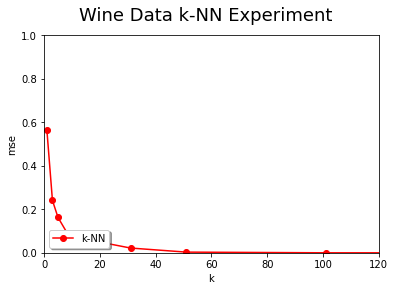

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas


wine_data = pandas.read_csv('/content/drive/MyDrive/ColabNotebooks/CS167Datasets/winequality-white.csv')
wine_data.head()

shuffled_data = wine_data.sample(frac=1, random_state = 41)
test_data = shuffled_data.iloc[0:320]
train_data = shuffled_data.iloc[320:]

k_vals = [1,3,5,9,15,21,31,51,101,129]
kNN_accuracies = []
for k in k_vals:
  predictions = regressions_all_kNN(test_data, train_data, k)
  current_accuracy = mse(test_data['quality'], predictions)
  kNN_accuracies.append(current_accuracy)

plt.suptitle('Wine Data k-NN Experiment', fontsize = 18)
plt.xlabel('k')
plt.ylabel('mse')
plt.plot(k_vals, kNN_accuracies, 'ro-', label = 'k-NN')
plt.legend(loc='lower left', shadow = True)
plt.axis([0, 120, 0, 1])

plt.show()

As K value gets bigger, MSE gets smaller and closer to zero, which means that our model have less and less error. 

# Exercise #4
Repeat the experiment and **graphically show the results** using r^2.

In [90]:
import pandas as pd
actual = pd.Series([.45,.76, .23,.98, .55])
#predicted = pd.Series([.45 ,.76, .23,.98, .55])
predicted = pd.Series([.55 ,.77, .28,.96, .57])

import sklearn.metrics #we'll talk more about sklearn tomorrow

r2_val = sklearn.metrics.r2_score(actual, predicted)
print("r^2 value: " , r2_val)

r^2 value:  0.9596044857108404


In [91]:
# change the path so to access the data on your drive 
wine_data = pandas.read_csv('/content/drive/MyDrive/ColabNotebooks/CS167Datasets/winequality-white.csv')

#shuffle the data "sampling" the full set in random order
shuffled_data = wine_data.sample(frac=1, random_state=41)

# establish test_data and train_data here
#use the first 320 rows in the shuffled set as testing data 
#train with the rest #1279 of 1599

test_data = shuffled_data.iloc[0:320]
train_data = shuffled_data.iloc[320:]
print(test_data.shape)
print(train_data.shape)

(320, 12)
(1279, 12)


In [92]:
def regression_kNN(new_example, train_data, k):
  train_data_copy = train_data.copy()
  train_data_copy['distance_to_new'] = numpy.sqrt(
    (new_example['fixed acidity']-train_data['fixed acidity'])**2
    +(new_example['volatile acidity']-train_data['volatile acidity'])**2
    +(new_example['citric acid']-train_data['citric acid'])**2
    +(new_example['residual sugar']-train_data['residual sugar'])**2
    +(new_example['chlorides']-train_data['chlorides'])**2
    +(new_example['free sulfur dioxide']-train_data['free sulfur dioxide'])**2
    +(new_example['total sulfur dioxide']-train_data['total sulfur dioxide'])**2
    +(new_example['density']-train_data['density'])**2
    +(new_example['pH']-train_data['pH'])**2
    +(new_example['sulphates']-train_data['sulphates'])**2
    +(new_example['alcohol']-train_data['alcohol'])**2
    )
  sorted_data = train_data_copy.sort_values(['distance_to_new']) 
  prediction = sorted_data.iloc[0:k]['quality'].mean()
  return prediction
  
  #return sorted_data.iloc[0:k]['quality'].mean()
  #print(regression_kNN)

In [93]:
#def mse(actual, predicted):
   # #get the series comparing the two series
   # compared = actual == predicted
   # correct_predictions = compared[ compared == True ]
   # num_correct = len(correct_predictions)
   # frac_correct = num_correct/len(actual)
   # return frac_correct

import sklearn.metrics 

def r2_val(actual, predicted):
  r2_val = sklearn.metrics.r2_score(actual, predicted)
  return r2_val

In [94]:
def regressions_all_kNN(test_data,train_data,k):
   return test_data.apply(regression_kNN,args=(train_data,k),axis=1)

In [134]:
import numpy
predictions4NN = regressions_all_kNN(test_data,train_data,25)
print('ACTUAL\tPREDICTIONS')
for i in range(20):
    print(test_data['quality'].iloc[i], "  ", predictions4NN.iloc[i] )

acc = r2_val(test_data['quality'],predictions4NN)
print("r2_val:", acc)

ACTUAL	PREDICTIONS
5    5.84
5    5.68
7    6.0
6    6.04
6    5.28
5    5.52
6    5.4
7    5.52
6    5.96
7    5.96
5    5.44
5    5.44
6    5.4
6    6.0
5    5.04
6    5.8
5    5.44
6    5.52
6    6.44
6    5.8
r2_val: 0.17692707292707288


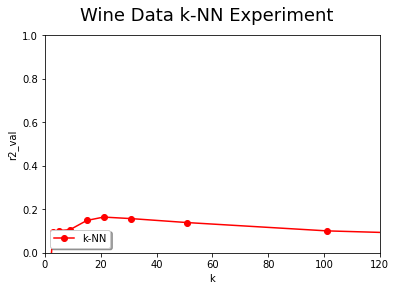

In [119]:
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas


wine_data = pandas.read_csv('/content/drive/MyDrive/ColabNotebooks/CS167Datasets/winequality-white.csv')
wine_data.head()

shuffled_data = wine_data.sample(frac=1, random_state = 41)
test_data = shuffled_data.iloc[0:320]
train_data = shuffled_data.iloc[320:]

k_vals = [1,3,5,9,15,21,31,51,101,129]
kNN_accuracies = []
for k in k_vals:
  predictions = regressions_all_kNN(test_data, train_data, k)
  current_accuracy = r2_val(test_data['quality'], predictions)
  kNN_accuracies.append(current_accuracy)

plt.suptitle('Wine Data k-NN Experiment', fontsize = 18)
plt.xlabel('k')
plt.ylabel('r2_val')
plt.plot(k_vals, kNN_accuracies, 'ro-', label = 'k-NN')
plt.legend(loc='lower left', shadow = True)
plt.axis([0, 120, 0, 1])

plt.show()

# Exercise #5. 
Describe your findings. What conclusions can you draw about the best number for k for the k-NN algorithm for this data set? **Explain why.** Use a markdown cell to explain your conclusions.

For r^2, the best number for k is 25 because that's when the r^2 value is the highest at 0.1769. After that, as K gets higher, r^2 value goes down and away from 1, which means its not going to be a perfect model. 
For MSE, the best number for k is 1 because that's when the MSE value is the highest at 0.56. As k gets higher, MSE value goes down and getting closer to zero, which means the model is having less and less error.